In [3]:
!pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 3.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.2
    Uninstalling pip-21.1.2:
      Successfully uninstalled pip-21.1.2


In [2]:
!pip install matplotlib

     |████████████████████████████████| 7.3 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 38.5 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
     |████████████████████████████████| 3.3 MB 58.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/shritej/Documents/GitHub/Econ/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 24.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 8.1 MB/s eta 0:00:00
  Using cached scipy-1.9.3-cp39-cp39-macosx_10_9_x86_64.whl (34.3 MB)


In [52]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 25.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.8 MB/s eta 0:00:00


In [66]:
!pip install scipy

In [81]:
#import necessary libraries
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure

import statsmodels.api as sm

figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
from scipy.signal import periodogram, welch

import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.arima_model import ARIMA

<Figure size 1280x960 with 0 Axes>

In [17]:
custom_date_parser = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv("AirPassengers.csv")

In [31]:
airpax_data = df.copy()
airpax_data['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True) #convert from string to datetime
airpax_data = airpax_data.set_index(['Month'])
df['Month'] = pd.to_datetime(df['Month'])

In [32]:
df.shape

(144, 2)

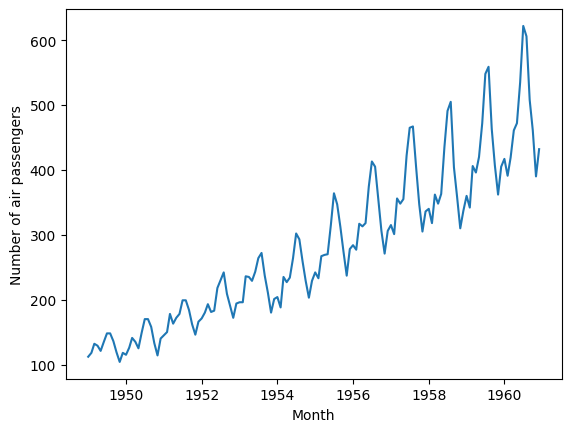

In [33]:
plt.xlabel('Month')
plt.ylabel('Number of air passengers')
plt.plot(airpax_data)

In [ ]:
ts = df['#Passengers']


In [117]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

In [57]:
#Test whether Timeseries is Stationary or not
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

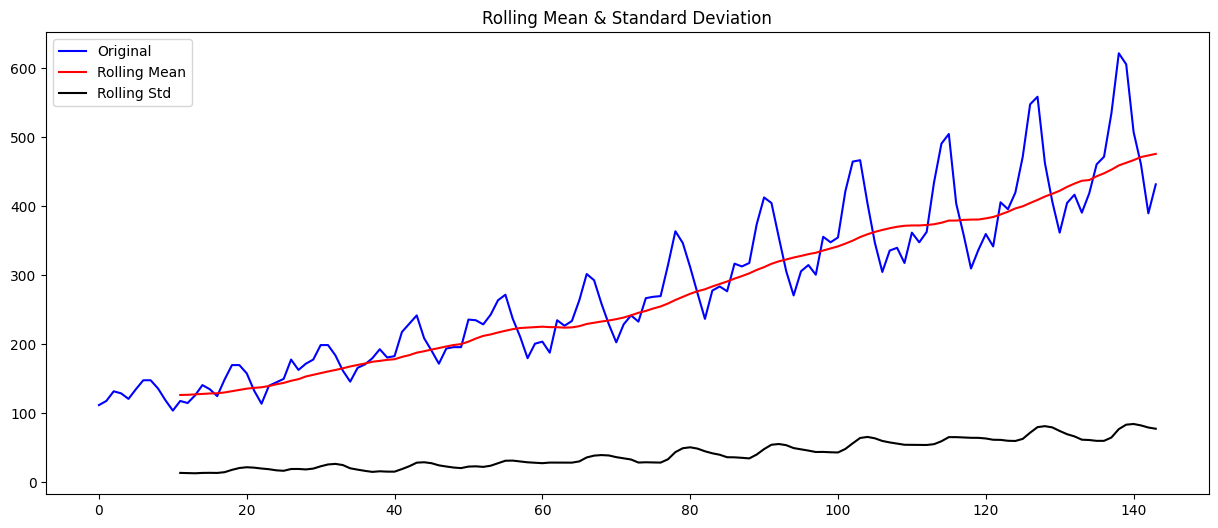

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [58]:
test_stationarity(ts)

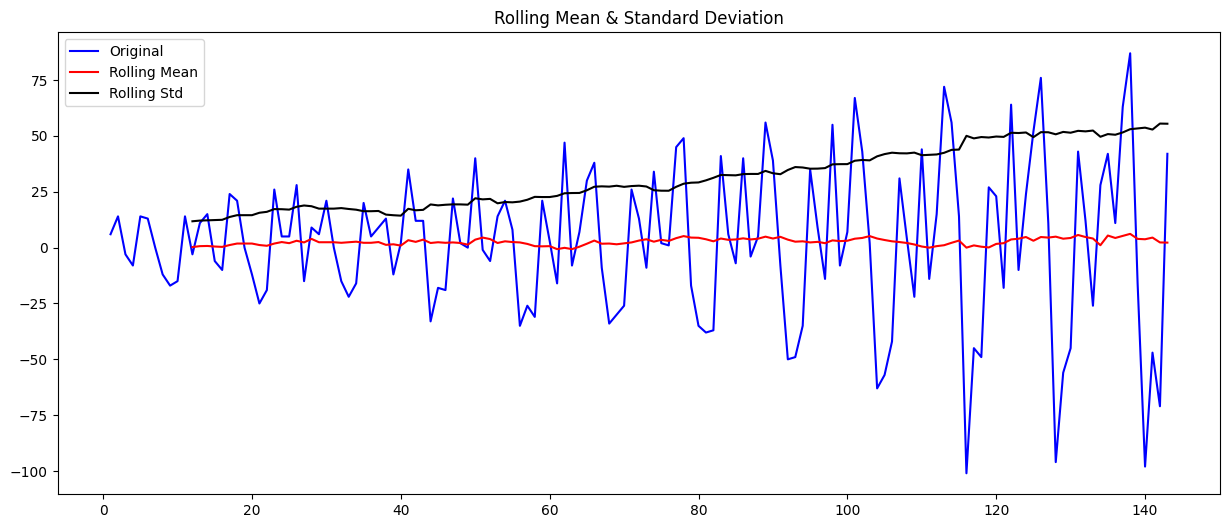

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [61]:
ts_df1 = ts.diff(periods = 1)
ts_df1.dropna(inplace = True)
test_stationarity(ts_df1)

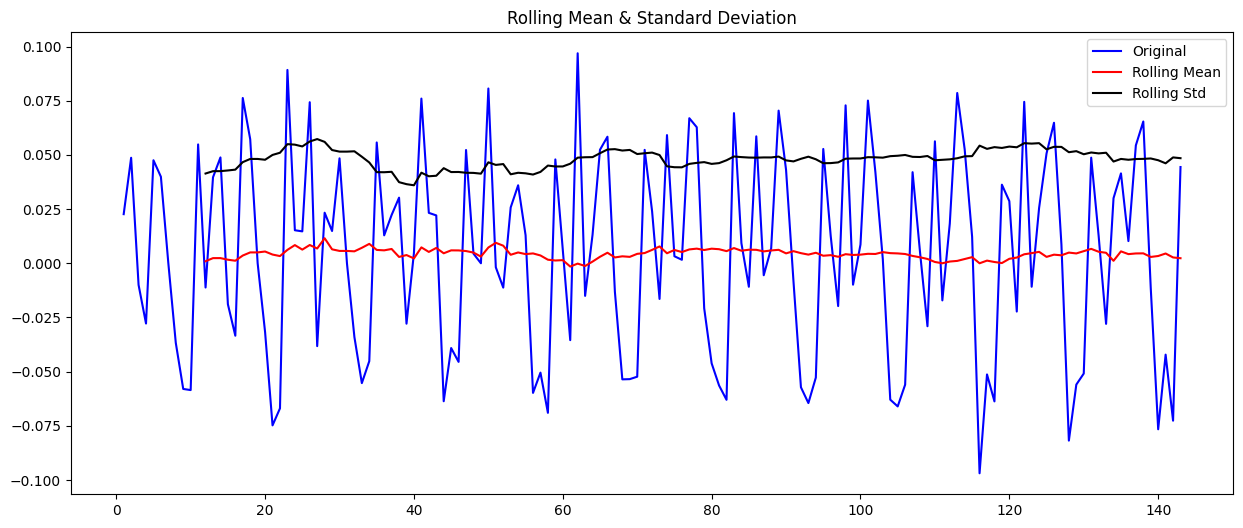

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [63]:
ts_log = np.log10(ts)
ts_logdf1 = ts_log.diff(periods = 1)
ts_logdf1.dropna(inplace = True)
test_stationarity(ts_logdf1)

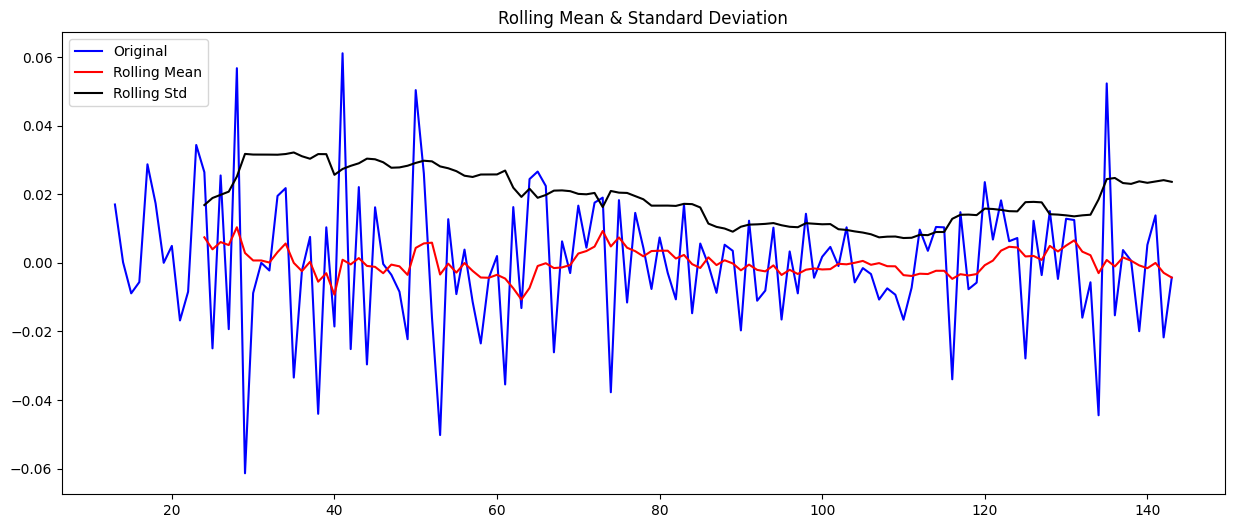

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [104]:
ts_log_df12 = ts_logdf1.diff(periods = 12)
ts_log_df12.dropna(inplace =True )
test_stationarity(ts_log_df12)


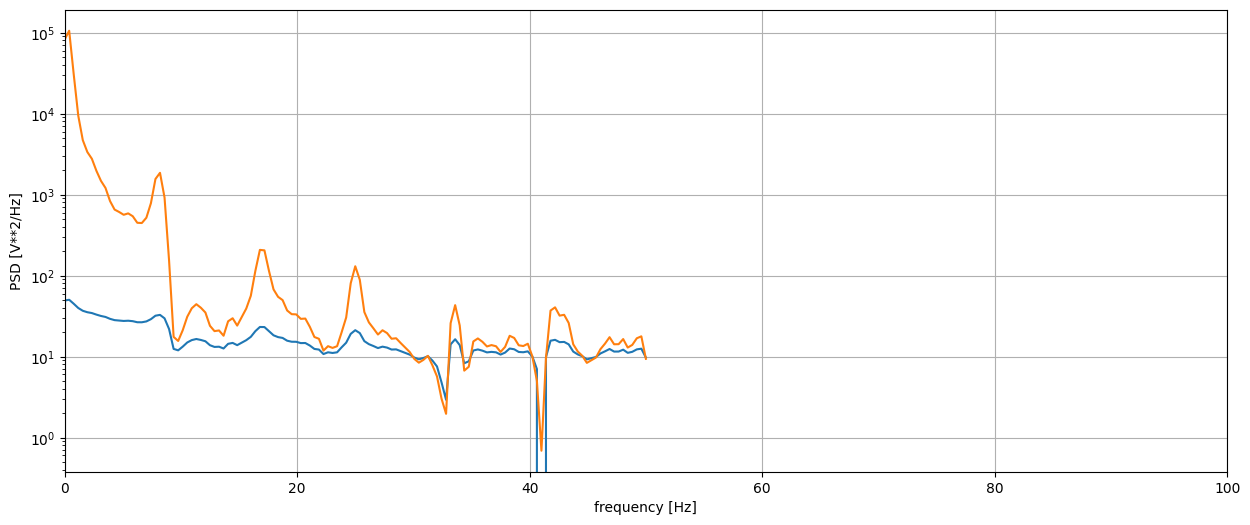

In [177]:
(S, f) = plt.psd(ts, Fs =100)

plt.semilogy(f, S)
plt.xlim([0, 100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

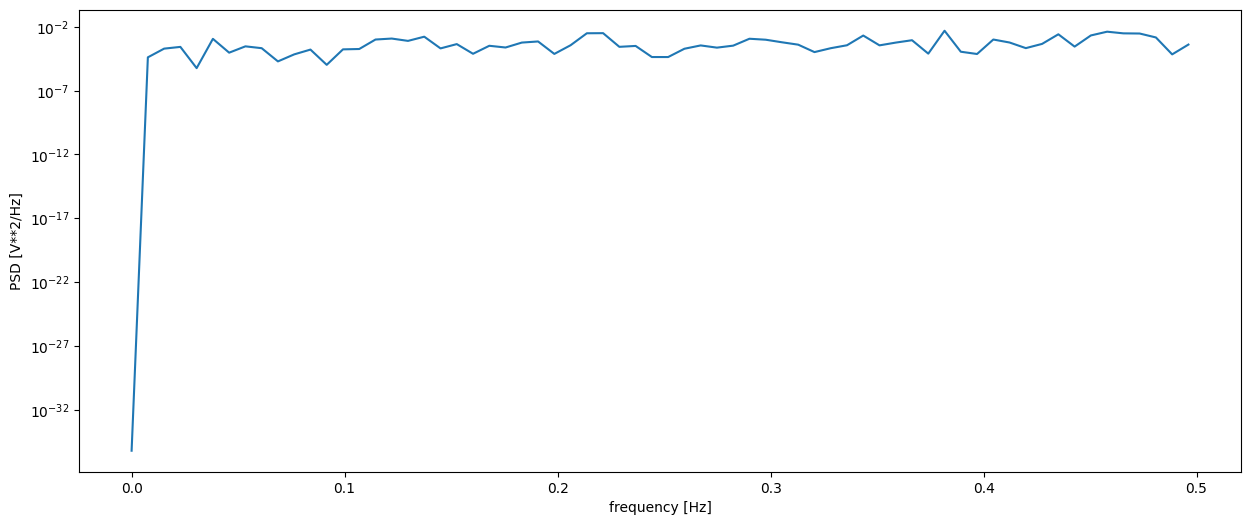

In [105]:
(f, prdgm) = periodogram(ts_log_df12)
plt.semilogy(f, prdgm)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

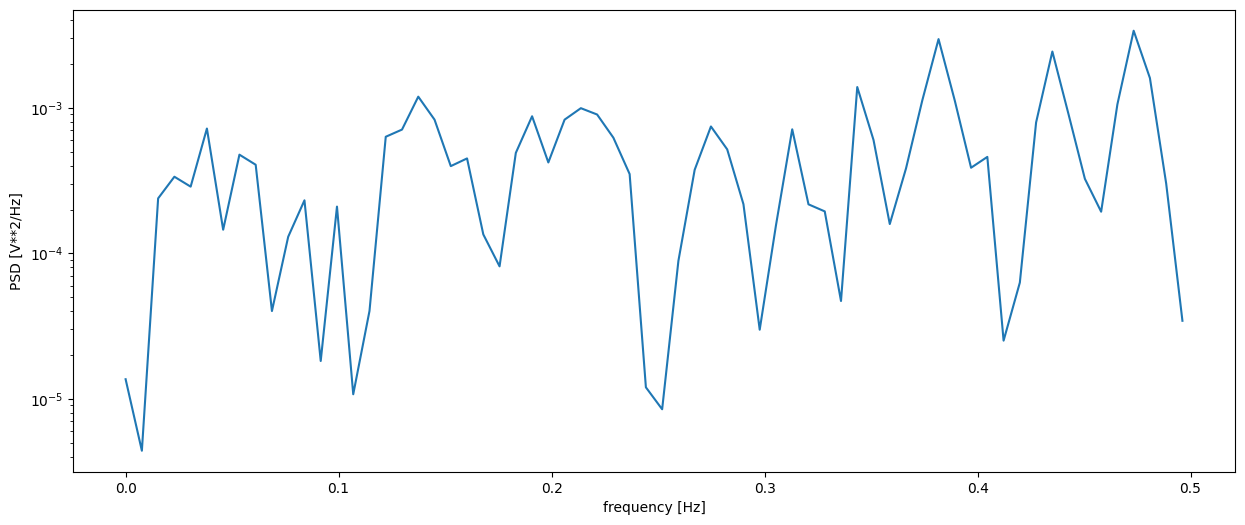

In [106]:
(f, S) = welch(ts_log_df12)
plt.semilogy(f, S)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [64]:
train = ts[:60]
test = ts[61:84]

trainlog = np.log10(train)

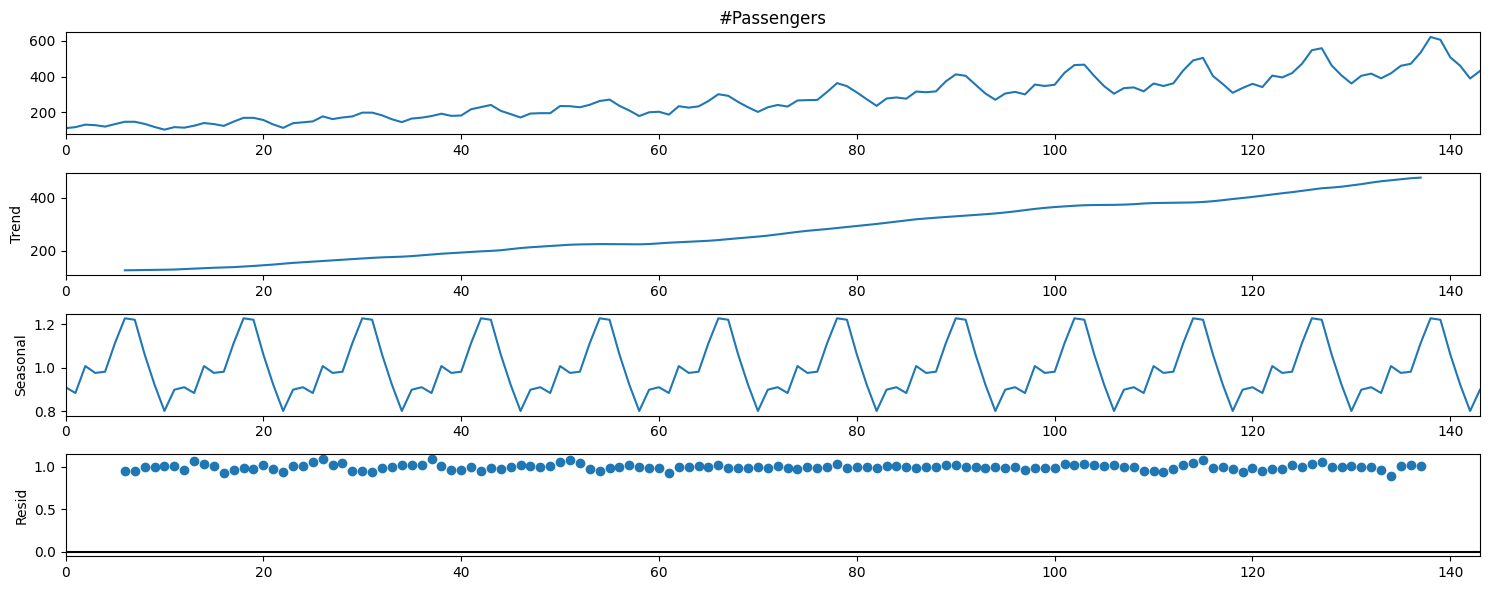

In [86]:
airpax_decompose = sm.tsa.seasonal_decompose(ts, model="multiplicative", period=12)
airpax_decompose.plot()
plt.show()

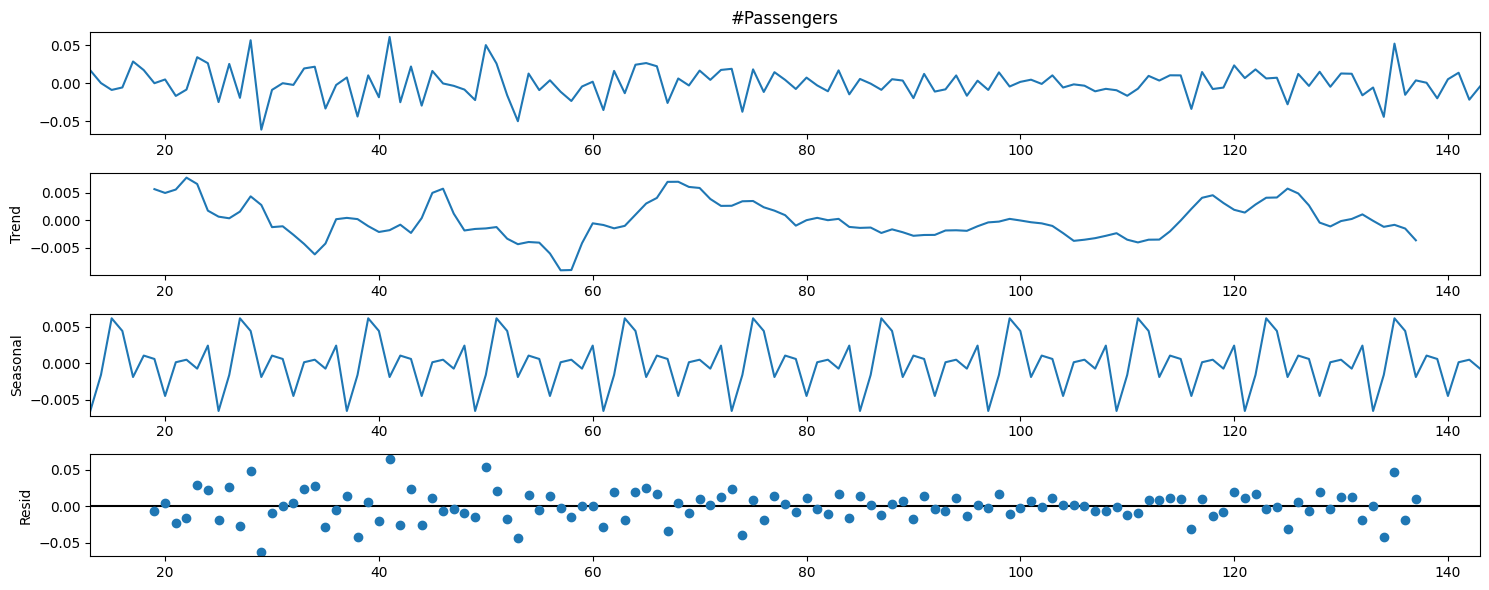

In [110]:
airpax_decompose = sm.tsa.seasonal_decompose(ts_log_df12, period = 12)
airpax_decompose.plot()
plt.show()

In [111]:
trend = airpax_decompose.trend
seasonal = airpax_decompose.seasonal
residual = airpax_decompose.resid

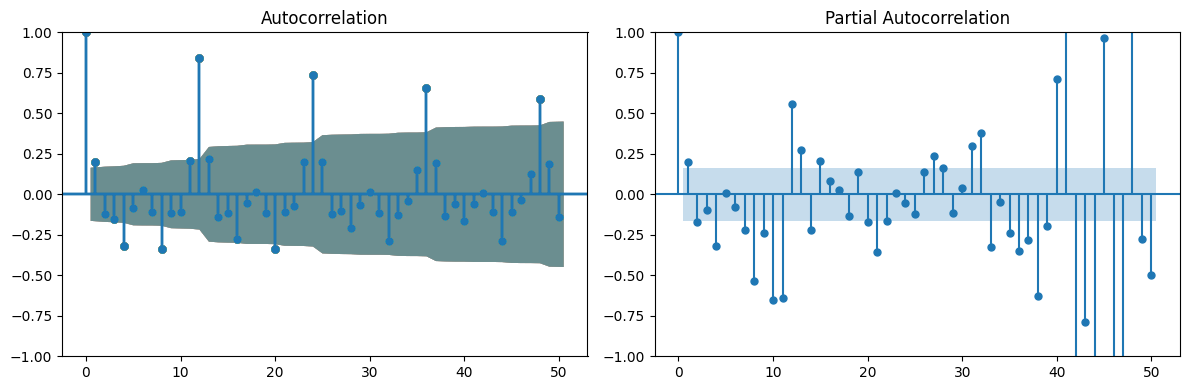

In [100]:
smt.graphics.plot_acf(ts_log_df1, lags=50, ax=axes[0])


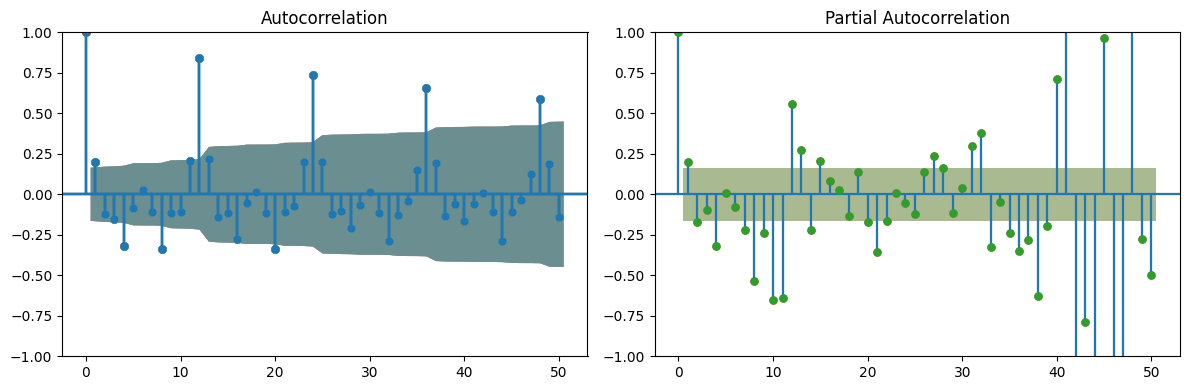

In [102]:
smt.graphics.plot_pacf(ts_logdf1, lags=50, ax=axes[1])

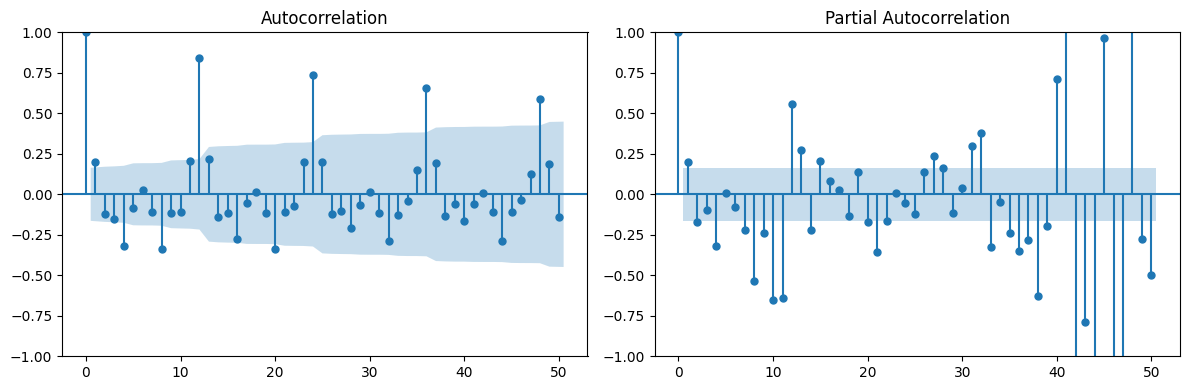

In [90]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_logdf1, lags=50, ax=axes[0])
smt.graphics.plot_pacf(ts_logdf1, lags=50, ax=axes[1])
plt.tight_layout()


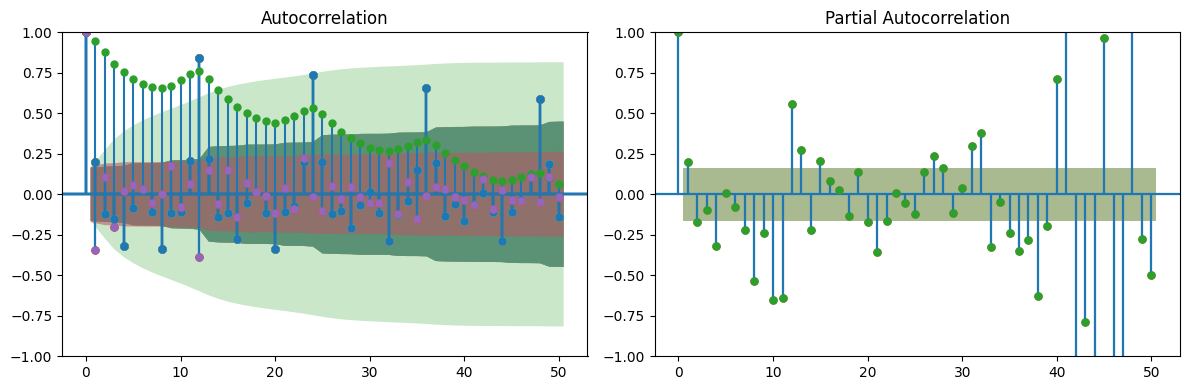

In [115]:
smt.graphics.plot_acf(ts_log_df12, lags=50, ax=axes[0])

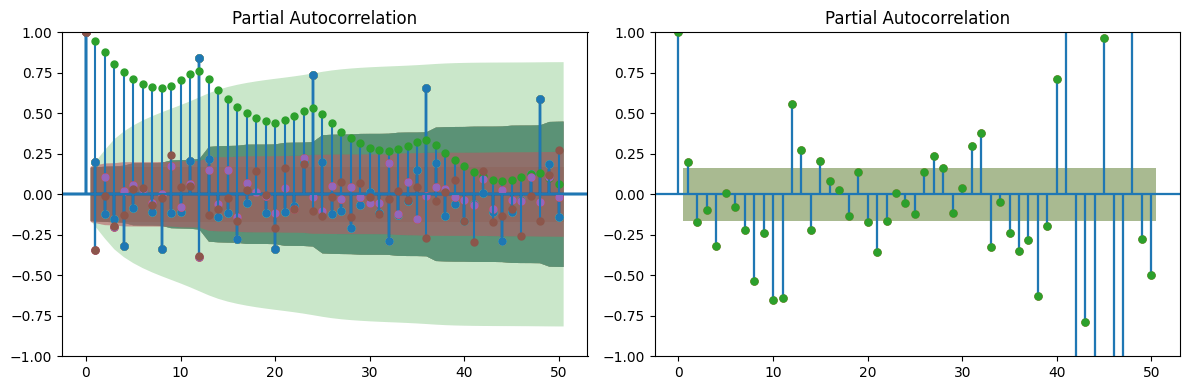

In [116]:
smt.graphics.plot_pacf(ts_log_df12, lags=50, ax=axes[0])

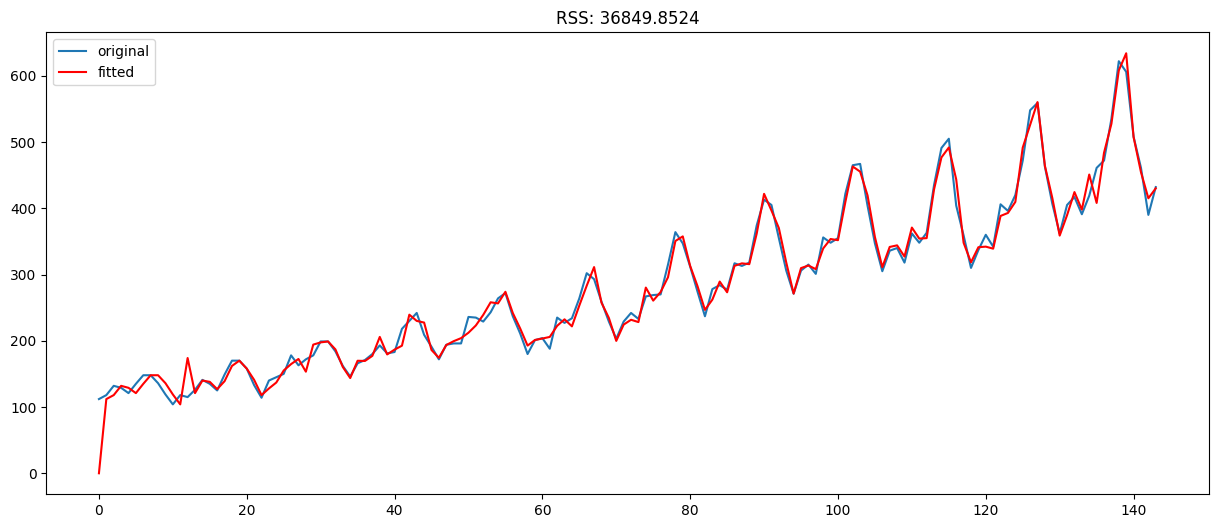

In [119]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(ts, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts, label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.legend()

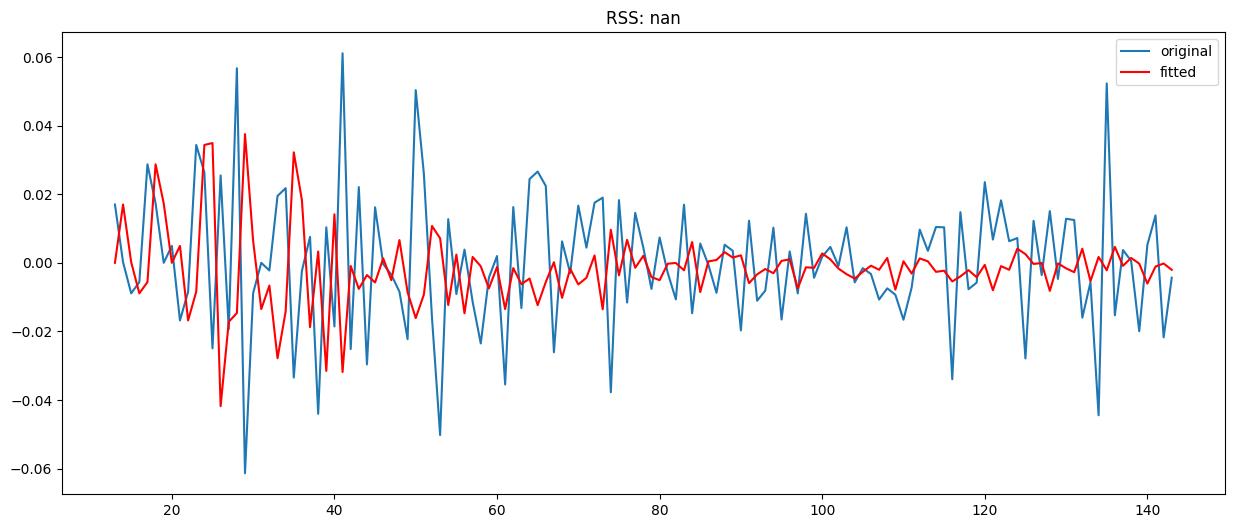

In [132]:
model1 = SARIMAX(log(, order=(0,1,1), seasonal_order=(0,1,1,12))
results_ARIMA1 = model1.fit(disp=-1)  
plt.plot(ts_log_df12, label='original')
plt.plot(results_ARIMA1.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA1.fittedvalues-ts)**2))
plt.legend()

In [153]:
mod = sm.tsa.statespace.SARIMAX(np.log10(train),
                                order=(0,1,1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=True)

best_results = mod.fit()

print(best_results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.81763D+00    |proj g|=  2.74854D+00

At iterate    5    f= -1.82136D+00    |proj g|=  2.46838D+00

At iterate   10    f= -1.95731D+00    |proj g|=  9.34297D+00

At iterate   15    f= -1.99096D+00    |proj g|=  1.18740D+00
  ys=-1.514E-06  -gs= 5.188E-06 BFGS update SKIPPED


 This problem is unconstrained.



At iterate   20    f= -1.99129D+00    |proj g|=  1.97200D-02

At iterate   25    f= -1.99143D+00    |proj g|=  3.43394D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     96      2     1     0   3.434D-02  -1.991D+00
  F =  -1.9914289374305763     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4885      0.172     -2.839      0.005      -0.826      -0.151
ma.S.L12      -0.8651      0.996     -0.869      0.385      -2


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [154]:
mod = sm.tsa.statespace.SARIMAX(np.log10(train),
                                order=(0,1,1),
                                seasonal_order=(1,0,1,12),
                                enforce_stationarity=True)

best_results101 = mod.fit()

print(best_results101.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.78508D+00    |proj g|=  1.55350D+01

At iterate    5    f= -2.06183D+00    |proj g|=  1.22129D+01

At iterate   10    f= -2.26685D+00    |proj g|=  6.84047D-01

At iterate   15    f= -2.26695D+00    |proj g|=  3.35191D-01

At iterate   20    f= -2.26893D+00    |proj g|=  2.41921D+00

At iterate   25    f= -2.27085D+00    |proj g|=  1.01420D+00

At iterate   30    f= -2.30861D+00    |proj g|=  1.76398D+00

At iterate   35    f= -2.31540D+00    |proj g|=  2.80206D+00

At iterate   40    f= -2.31729D+00    |proj g|=  5.86311D-01

At iterate   45    f= -2.31832D+00    |proj g|=  4.28431D-01

At iterate   50    f= -2.31836D+00    |proj g|=  2.84480D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [156]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)
pred99_101 = best_results101.get_forecast(steps=24, alpha=0.1)

In [157]:
df_test =pd.DataFrame(test)
df_test['Passengers_Forecast_11'] = np.power(10, pred99.predicted_mean)
df_test['Passengers_Forecast_101'] = np.power(10, pred99_101.predicted_mean)

In [159]:
df_test['ape11'] = abs(df_test['Passengers_Forecast_11'] - df_test['#Passengers'])/df_test['#Passengers']
df_test['ape101'] = abs(df_test['Passengers_Forecast_101'] - df_test['#Passengers'])/df_test['#Passengers']

In [160]:
df_test

,#Passengers,Passengers_Forecast_11,Passengers_Forecast_101,ape11,ape101
61,188,218.390525,215.643193,0.161652,0.147038
62,235,249.066618,245.282728,0.059858,0.043756
63,227,238.358506,235.103078,0.050037,0.035696
64,234,233.814465,230.906502,0.000793,0.013220
65,264,260.890250,256.719482,0.011779,0.027578
66,302,286.397153,280.945779,0.051665,0.069716
67,293,291.383339,285.910498,0.005518,0.024196
68,259,262.070785,257.543762,0.011856,0.005623
69,229,230.888386,227.819734,0.008246,0.005154
70,203,202.427063,200.388529,0.002822,0.012864


In [161]:
print(df_test['ape11'].mean())
print(df_test['ape101'].mean())

0.04111727873075017
0.048234359864394116


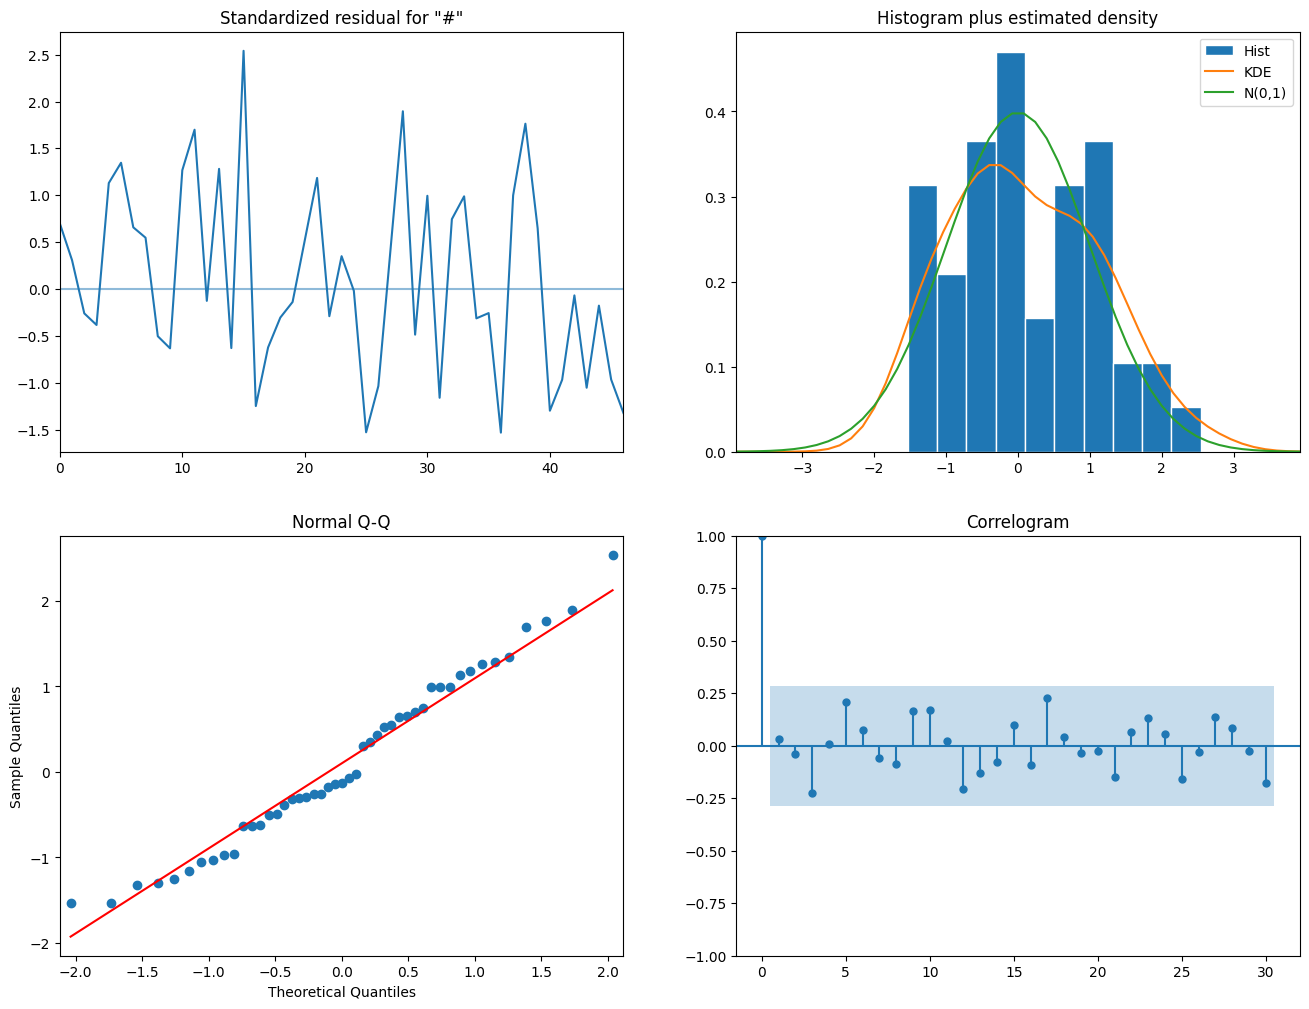

In [162]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

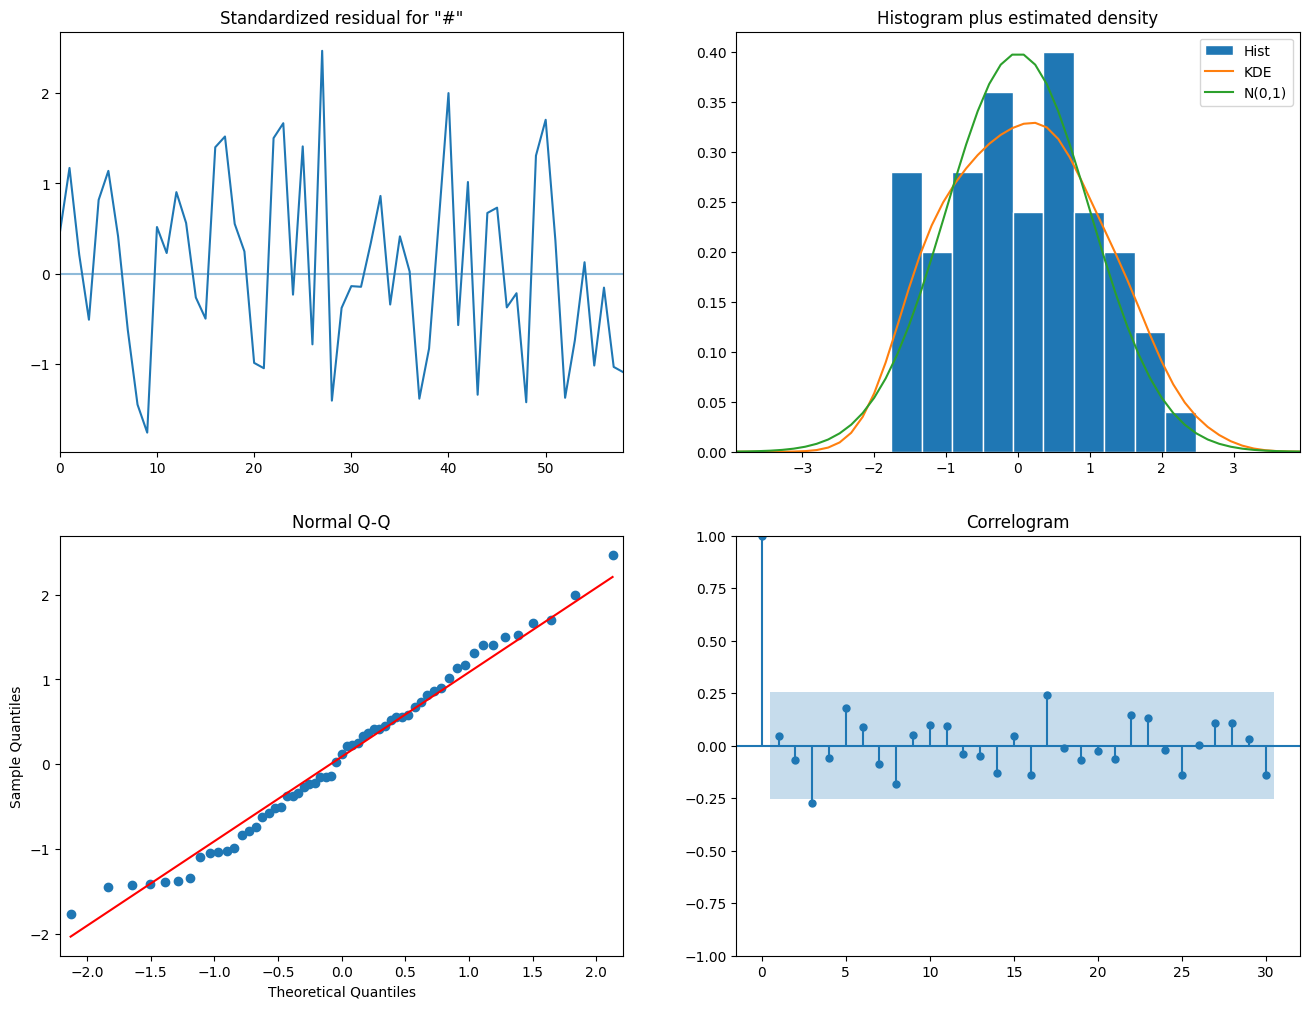

In [163]:
best_results101.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()